# Lecture 10


### More iterative methods

## The Gauss-Seidel Algorithm

Our goal is still to solve but now we include more in our inverse:
$$ A\vec x = \vec b$$
$$ (L + D + U) \vec x = \vec b$$
$$ (L + D)^{-1}( L + D + U) \vec x = (L + D)^{-1}\vec b$$
$$ \vec x + (L + D)^{-1}U \vec x = (L + D)^{-1}\vec b$$

So, we can now attempt to apply the Neuman series iteration with $M = - (L + D)^{-1}U$ and $\vec b$ replaced with $(L + D)^{-1}\vec b$.

This is the Gauss-Seidel algorithm.  But some care should be taken on the implementation:

```
INPUT: An n x n matrix A, an n x 1 vector b, an error tolerance err, a maximum number of steps K
OUPUT: An approximation of the solution of A*x = b

STEP 1: Set y = zeros(n,1)
STEP 2: Set L = tril(A,-1); U = triu(A,1); D = diag(A);
STEP 3: Set c = (L+D)^{-1} b
STEP 4: For i = 1 to T do STEPS 5-7
    STEP 5: Set y = U*y
    STEP 6: Set y = -(L+D)^{-1}y + c
    STEP 7:If max(abs(A*y-b)) < err
        OUTPUT(y)
STEP 8: If i == T
    PRINT("Error tolerance not acheived")
    OUTPUT(y)
```

In [135]:
A = diag([1,2,3,4,5]) + .1*randn(5);
LpD = tril(A);
U = triu(A,+1);
b = [1,1,1,1,1]';
y = zeros(5,1);
c = Forsub([LpD,b]);

In [145]:
% compute y = -(L+D)^{-1}Uy + (L+D)^{-1}b
format long
y = U*y;
y = -Forsub([LpD,y]) + c


y =

   0.973794596512889
   0.422916809276048
   0.342121401248073
   0.270947814549081
   0.203029717617549



In [146]:
A*y-b


ans =

   1.0e-15 *

  -0.222044604925031
                   0
                   0
  -0.111022302462516
                   0



## Compare the Jacobi and Gauss-Seidel algorithms

In [147]:
A = diag([1,2,3,4,5]) + .1*randn(5);
L = tril(A,-1);
U = triu(A,+1);
D = diag(A);
LpD = tril(A); %L + D
LpU = L + U; % L + U
b = [1,1,1,1,1]';
c_gs = Forsub([LpD,b]);
c_j = b./D;

y_gs = zeros(5,1);
y_j = zeros(5,1);
format long
x = A\b;  % solves Ax = b

In [152]:
y_j = -(LpU*y_j)./D + c_j;
y_gs = U*y_gs;
y_gs = -Forsub([LpD,y_gs]) + c_gs;
[y_j,y_gs]
[y_j-x,y_gs-x]


ans =

   1.154460131106625   1.154491610352473
   0.436692808652272   0.436675819771856
   0.294216814915991   0.294209771590310
   0.278478713797363   0.278482731219680
   0.153983527975131   0.153972237327408


ans =

   1.0e-04 *

  -0.314778649070924   0.000013809409172
   0.169887938217816  -0.000000865945649
   0.070433580912077   0.000000324101301
  -0.040173326334436   0.000000896829833
   0.112905911367756  -0.000000565858194



In [153]:
A = diag([1,2,3,4,5]) + .1*randn(5);
L = tril(A,-1);
U = triu(A,+1);
D = diag(A);
LpD = tril(A); %L + D
LpU = L + U; % L + U
b = [1,1,1,1,1]';
c_gs = Forsub([LpD,b]);
c_j = b./D;

y_gs = zeros(5,1);
y_j = zeros(5,1);
format long
x = A\b;

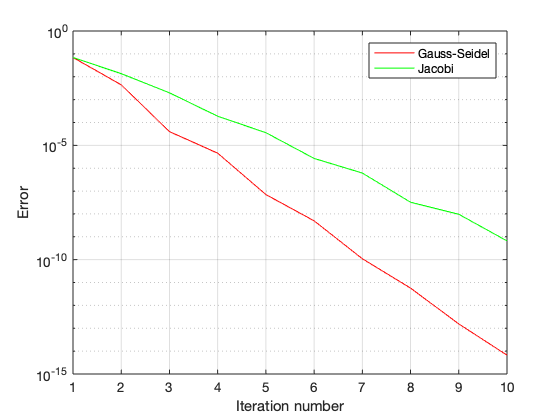

In [154]:
T = 10;
err_gs = zeros(1,T);
err_j = zeros(1,T);

for i = 1:T
    y_j = -(LpU*y_j)./D + c_j;
    y_gs = U*y_gs;
    y_gs = -Forsub([LpD,y_gs]) + c_gs;
    err_gs(i) = max(abs(y_gs-x));
    err_j(i) = max(abs(y_j-x));
end
semilogy(1:T,err_gs,'r')
hold on
grid on
semilogy(1:T,err_j,'g')
legend('Gauss-Seidel','Jacobi')
xlabel('Iteration number')
ylabel('Error')

## A computational subtley 

When we multply by $U$ in the Gauss-Seidel algorithm, $U$ has a lot of zeros.  So, we should be tempted to make use of this structure so that we can do fewer multiplications and additions.  In theory this is a good idea and if you were developing low-level code in C++ or Fortran, you should probably be doing this.  But as we can see in the following example, coding it ourselves does not save time.

In [155]:
n = 2000; U = triu(randn(n,n),1); b = randn(n,1);
tic();
U*b;
toc();
tic();
multU(U,b);
toc();

Elapsed time is 0.002627 seconds.
Elapsed time is 0.020808 seconds.


## Convergence

A fundamental question is "When does Jacobi's algorithm/the Gauss-Seidel algorithm work?" A more mathematical way to phrase this is, under what conditions on $A$ does
$$
\lim_{k \to \infty} \vec x_k = \vec x, \quad A \vec x = \vec b.
$$

#### Definition

An $n \times n$ matrix $A$ is said to be __diagonally dominant__ if

$$ |a_{ii}| > \sum_{j=1,~~i\neq j}^n |a_{ij}|, ~~\text{for all}~~ 1 \leq i \leq n.$$

#### Theorem

Jacobi's method and the Gauss-Seidel method converge if $A$ is __diagonally dominant__.